In [ ]:
%cd drive/MyDrive/MML/Kryptonite-N

/content/drive/MyDrive/MML/Kryptonite-N


In [ ]:
!pip install tensorflow

In [ ]:
!pip install codecarbon

In [ ]:
import tempfile
import os
import numpy as np
import torch
from tqdm import tqdm
from torch import nn, optim
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2Model
import pandas as pd
from tensorflow.keras.layers import Dropout, BatchNormalization
from tqdm import tqdm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

Extra Trees with different polynomial feature expansions for n = 9

Evaluating Extra Trees Classifier with polynomial degree 2...
Degree 2: Train Accuracy = 1.0000, Test Accuracy = 0.9519
Evaluating Extra Trees Classifier with polynomial degree 3...
Degree 3: Train Accuracy = 1.0000, Test Accuracy = 0.9542
Evaluating Extra Trees Classifier with polynomial degree 4...
Degree 4: Train Accuracy = 1.0000, Test Accuracy = 0.9542
Evaluating Extra Trees Classifier with polynomial degree 5...
Degree 5: Train Accuracy = 1.0000, Test Accuracy = 0.9536


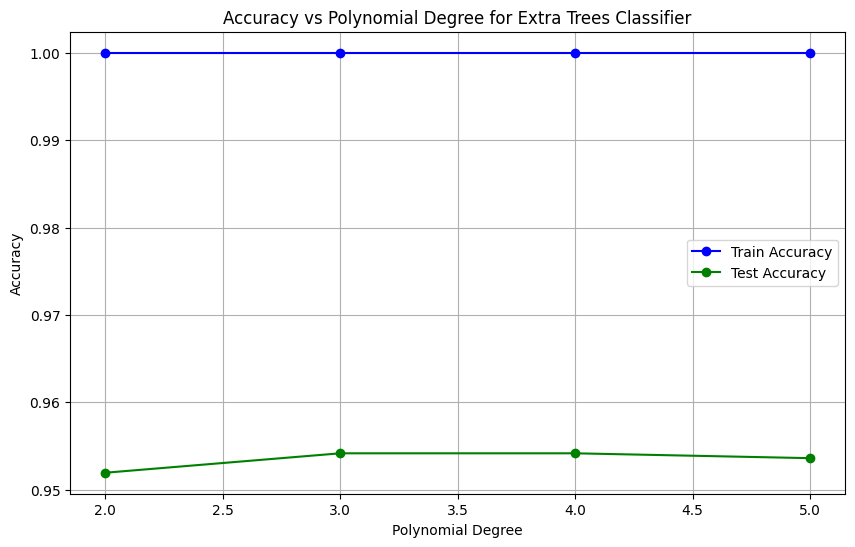

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Define polynomial degrees to try
degrees = [2, 3, 4, 5]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over different polynomial degrees
for degree in degrees:
    print(f"Evaluating Extra Trees Classifier with polynomial degree {degree}...")

    # Step 1: Preprocessing - Polynomial Features
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    # Transform training and test sets
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    # Step 3: Train Extra Trees Classifier
    model = ExtraTreesClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Step 4: Make predictions and evaluate
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Degree {degree}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    # Store accuracies for plotting
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(degrees, test_accuracies, marker='o', label='Test Accuracy', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Polynomial Degree for Extra Trees Classifier')
plt.legend()
plt.grid(True)
plt.show()


Extra Trees with different polynomial feature expansions for n = 12

Evaluating Extra Trees Classifier with polynomial degree 2...
Degree 2: Train Accuracy = 1.0000, Test Accuracy = 0.6790
Evaluating Extra Trees Classifier with polynomial degree 3...
Degree 3: Train Accuracy = 1.0000, Test Accuracy = 0.7904
Evaluating Extra Trees Classifier with polynomial degree 4...
Degree 4: Train Accuracy = 1.0000, Test Accuracy = 0.8404
Evaluating Extra Trees Classifier with polynomial degree 5...
Degree 5: Train Accuracy = 1.0000, Test Accuracy = 0.8729
Evaluating Extra Trees Classifier with polynomial degree 6...
Degree 6: Train Accuracy = 1.0000, Test Accuracy = 0.8812


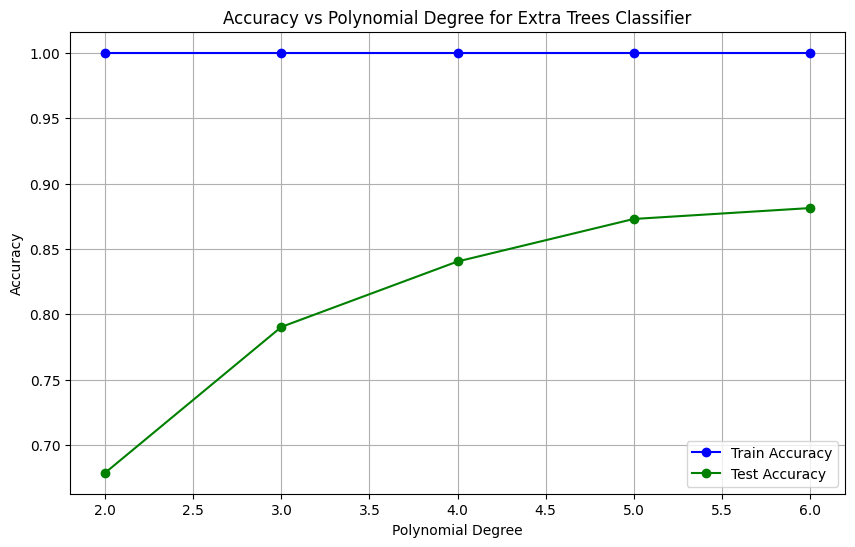

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Define polynomial degrees to try
degrees = [2, 3, 4, 5, 6]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over different polynomial degrees
for degree in degrees:
    print(f"Evaluating Extra Trees Classifier with polynomial degree {degree}...")

    # Step 1: Preprocessing - Polynomial Features (fit only on training data)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Standardize features (fit only on training data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    # Step 3: Train Extra Trees Classifier
    model = ExtraTreesClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Step 4: Make predictions and evaluate
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Degree {degree}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    # Store accuracies for plotting
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(degrees, test_accuracies, marker='o', label='Test Accuracy', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Polynomial Degree for Extra Trees Classifier')
plt.legend()
plt.grid(True)
plt.show()


Extra Trees with different polynomial feature expansions for n = 15

Evaluating Extra Trees Classifier with polynomial degree 2...
Degree 2: Train Accuracy = 1.0000, Test Accuracy = 0.5017
Evaluating Extra Trees Classifier with polynomial degree 3...
Degree 3: Train Accuracy = 1.0000, Test Accuracy = 0.5140
Evaluating Extra Trees Classifier with polynomial degree 4...
Degree 4: Train Accuracy = 1.0000, Test Accuracy = 0.5308
Evaluating Extra Trees Classifier with polynomial degree 5...
Degree 5: Train Accuracy = 1.0000, Test Accuracy = 0.5308


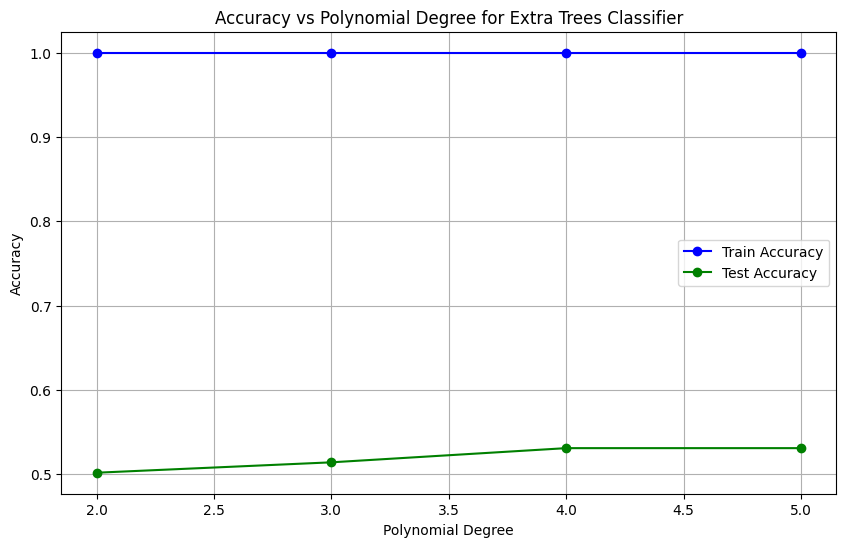

In [ ]:


# Load the dataset
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Define polynomial degrees to try
degrees = [2, 3, 4, 5]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over different polynomial degrees
for degree in degrees:
    print(f"Evaluating Extra Trees Classifier with polynomial degree {degree}...")

    # Step 1: Preprocessing - Polynomial Features (fit only on training data)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Standardize features (fit only on training data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    # Step 3: Train Extra Trees Classifier
    model = ExtraTreesClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Step 4: Make predictions and evaluate
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Degree {degree}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    # Store accuracies for plotting
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(degrees, test_accuracies, marker='o', label='Test Accuracy', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Polynomial Degree for Extra Trees Classifier')
plt.legend()
plt.grid(True)
plt.show()

Kryptonite 9 Grid Search to choose best hyperparameters

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial features, scaling, and Extra Trees Classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # Step 1: Polynomial feature generation
    ('scaler', StandardScaler()),                       # Step 2: Standardize the features
    ('extra_trees', ExtraTreesClassifier(random_state=42))  # Step 3: Extra Trees Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'extra_trees__n_estimators': [100, 200],            # Number of trees in the forest
    'extra_trees__min_samples_leaf': [2, 3, 4],           # Maximum depth of each tree
    'extra_trees__min_samples_split': [2,3],           # Minimum samples required to split a node
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Display progress
    scoring='accuracy'
)

# Run the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to check for generalization
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters found:
{'extra_trees__min_samples_leaf': 3, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200}
Best Cross-Validated Accuracy: 0.9534
Test Accuracy: 0.9556


Kryptonite 12 Grid Search to choose best hyperparameters

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial features, scaling, and Extra Trees Classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # Step 1: Polynomial feature generation
    ('scaler', StandardScaler()),                       # Step 2: Standardize the features
    ('extra_trees', ExtraTreesClassifier(random_state=42))  # Step 3: Extra Trees Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'extra_trees__n_estimators': [100, 200],            # Number of trees in the forest
    'extra_trees__min_samples_leaf': [2, 3, 4],           # Maximum depth of each tree
    'extra_trees__min_samples_split': [2,3],           # Minimum samples required to split a node
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Display progress
    scoring='accuracy'
)

# Run the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to check for generalization
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Hyperparameters found:
{'extra_trees__min_samples_leaf': 2, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200}
Best Cross-Validated Accuracy: 0.6651
Test Accuracy: 0.6935


Kryptonite 15 Grid Search to choose best hyperparameters

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for polynomial features, scaling, and Extra Trees Classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # Step 1: Polynomial feature generation
    ('scaler', StandardScaler()),                       # Step 2: Standardize the features
    ('extra_trees', ExtraTreesClassifier(random_state=42))  # Step 3: Extra Trees Classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'extra_trees__n_estimators': [100, 200],            # Number of trees in the forest
    'extra_trees__min_samples_leaf': [2, 3, 4],           # Maximum depth of each tree
    'extra_trees__min_samples_split': [2,3],           # Minimum samples required to split a node
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available processors
    verbose=2,          # Display progress
    scoring='accuracy'
)

# Run the grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

# Evaluate the best model on the test set to check for generalization
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Hyperparameters found:
{'extra_trees__min_samples_leaf': 2, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200}
Best Cross-Validated Accuracy: 0.5045
Test Accuracy: 0.5178


5 Fold CV with best hyperparameters for n = 9

In [ ]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(project_name='Kryptonite-9-Extra-Trees')
tracker.start()

[codecarbon INFO @ 07:30:03] [setup] RAM Tracking...
[codecarbon INFO @ 07:30:03] [setup] GPU Tracking...
[codecarbon INFO @ 07:30:03] No GPU found.
[codecarbon INFO @ 07:30:03] [setup] CPU Tracking...
[codecarbon WARNING @ 07:30:03] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 07:30:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 07:30:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 07:30:04] >>> Tracker's metadata:
[codecarbon INFO @ 07:30:04]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 07:30:04]   Python version: 3.10.12
[codecarbon INFO @ 07:30:04]   CodeCarbon version: 2.7.4
[codecarbon INFO @ 07:30:04]   Available RAM : 12.675 GB
[codecarbon INFO @ 07:30:04]   CPU count: 2
[codecarbon INFO @ 07:30

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# List of random seeds to iterate over
seeds = [42, 99, 123]

# Loop over different random seeds
for seed in seeds:
    print(f"\nEvaluating with Random Seed {seed}...\n")

    # Initialize the ExtraTreesClassifier model with the best hyperparameters
    et_model = ExtraTreesClassifier(
        n_estimators=200,            # n_estimators = 200 (number of trees)
        min_samples_split=2,         # min_samples_split = 2 (minimum samples required to split a node)
        min_samples_leaf=3,          # min_samples_leaf = 4 (minimum samples required at leaf nodes)
        random_state=seed           # Set the random seed here
    )

    # List to store the accuracy for each fold
    accuracies = []

    # Initialize KFold for cross-validation with the given seed
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Perform K-Fold Cross-Validation and print classification report for each fold
    degree = 4  # Degree of the polynomial features
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split data into training and validation sets based on the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the scaler only on the training set and transform both sets
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)

        # Train the model on the training set
        et_model.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = et_model.predict(X_val_scaled)

        # Calculate accuracy for the current fold
        fold_accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(fold_accuracy)

        # Print the classification report for the current fold
        print(classification_report(y_val, y_val_pred))
        print("="*80)  # Separator for clarity between folds

    # Calculate mean and standard deviation of accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)

    print(f"Mean Accuracy for seed {seed}: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy for seed {seed}: {std_deviation:.4f}")

tracker.stop()


Evaluating with Random Seed 42...

Fold 1


[codecarbon INFO @ 07:30:35] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:30:35] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:30:35] 0.000394 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:30:50] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:30:50] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:30:50] 0.000591 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1808
           1       0.96      0.96      0.96      1792

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 2


[codecarbon INFO @ 07:31:05] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:31:05] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:31:05] 0.000788 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:31:20] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:31:20] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:31:20] 0.000985 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1786
           1       0.96      0.97      0.96      1814

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 3


[codecarbon INFO @ 07:31:35] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:31:35] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:31:35] 0.001182 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:31:50] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:31:50] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:31:50] 0.001378 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1787
           1       0.96      0.96      0.96      1813

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 4


[codecarbon INFO @ 07:32:05] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:32:05] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:32:05] 0.001576 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:32:05] 0.002867 g.CO2eq/s mean an estimation of 90.42418955886691 kg.CO2eq/year
[codecarbon INFO @ 07:32:20] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:32:20] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:32:20] 0.001772 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1768
           1       0.96      0.96      0.96      1832

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 5


[codecarbon INFO @ 07:32:35] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:32:35] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:32:35] 0.001969 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:32:50] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:32:50] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:32:50] 0.002166 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1815
           1       0.96      0.95      0.95      1785

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

Mean Accuracy for seed 42: 0.9580
Standard Deviation of Accuracy for seed 42: 0.0031

Evaluating with Random Seed 99...

Fold 1


[codecarbon INFO @ 07:33:05] Energy consumed for RAM : 0.000238 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:33:05] Energy consumed for all CPUs : 0.002126 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:33:05] 0.002363 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1826
           1       0.96      0.96      0.96      1774

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 2


[codecarbon INFO @ 07:33:20] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:33:20] Energy consumed for all CPUs : 0.002303 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:33:20] 0.002560 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:33:35] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:33:35] Energy consumed for all CPUs : 0.002480 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:33:35] 0.002757 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1790
           1       0.95      0.96      0.95      1810

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

Fold 3


[codecarbon INFO @ 07:33:50] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:33:50] Energy consumed for all CPUs : 0.002657 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:33:50] 0.002954 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:34:05] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:34:05] Energy consumed for all CPUs : 0.002834 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:34:05] 0.003151 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:34:05] 0.002867 g.CO2eq/s mean an estimation of 90.41647484843297 kg.CO2eq/year


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1804
           1       0.96      0.97      0.96      1796

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 4


[codecarbon INFO @ 07:34:20] Energy consumed for RAM : 0.000337 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:34:20] Energy consumed for all CPUs : 0.003011 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:34:20] 0.003348 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:34:35] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:34:35] Energy consumed for all CPUs : 0.003188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:34:35] 0.003544 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1767
           1       0.96      0.96      0.96      1833

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 5


[codecarbon INFO @ 07:34:50] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:34:50] Energy consumed for all CPUs : 0.003365 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:34:50] 0.003741 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1777
           1       0.96      0.95      0.95      1823

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

Mean Accuracy for seed 99: 0.9582
Standard Deviation of Accuracy for seed 99: 0.0039

Evaluating with Random Seed 123...

Fold 1


[codecarbon INFO @ 07:35:05] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:35:05] Energy consumed for all CPUs : 0.003542 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:35:05] 0.003938 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:35:20] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:35:20] Energy consumed for all CPUs : 0.003719 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:35:20] 0.004135 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1806
           1       0.96      0.95      0.95      1794

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

Fold 2


[codecarbon INFO @ 07:35:35] Energy consumed for RAM : 0.000436 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:35:35] Energy consumed for all CPUs : 0.003896 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:35:35] 0.004332 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:35:50] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:35:50] Energy consumed for all CPUs : 0.004073 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:35:50] 0.004529 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1802
           1       0.96      0.96      0.96      1798

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 3


[codecarbon INFO @ 07:36:05] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:36:05] Energy consumed for all CPUs : 0.004251 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:36:05] 0.004726 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:36:05] 0.002867 g.CO2eq/s mean an estimation of 90.41499202342581 kg.CO2eq/year
[codecarbon INFO @ 07:36:20] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:36:20] Energy consumed for all CPUs : 0.004428 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:36:20] 0.004923 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1819
           1       0.96      0.96      0.96      1781

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 4


[codecarbon INFO @ 07:36:35] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:36:35] Energy consumed for all CPUs : 0.004605 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:36:35] 0.005119 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:36:50] Energy consumed for RAM : 0.000535 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:36:50] Energy consumed for all CPUs : 0.004782 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:36:50] 0.005316 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1790
           1       0.95      0.96      0.96      1810

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Fold 5


[codecarbon INFO @ 07:37:05] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:37:05] Energy consumed for all CPUs : 0.004959 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:37:05] 0.005513 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:37:15] Energy consumed for RAM : 0.000568 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 07:37:15] Energy consumed for all CPUs : 0.005076 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:37:15] 0.005644 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1747
           1       0.97      0.96      0.96      1853

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600

Mean Accuracy for seed 123: 0.9582
Standard Deviation of Accuracy for seed 123: 0.0028


0.0012333892036281435

5 Fold CV with best hyperparameters for n = 12

In [ ]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(project_name='Kryptonite-12-Extra-Trees')
tracker.start()


[codecarbon INFO @ 18:04:20] [setup] RAM Tracking...
[codecarbon INFO @ 18:04:20] [setup] GPU Tracking...
[codecarbon INFO @ 18:04:20] No GPU found.
[codecarbon INFO @ 18:04:20] [setup] CPU Tracking...
[codecarbon WARNING @ 18:04:20] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 18:04:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 18:04:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 18:04:22] >>> Tracker's metadata:
[codecarbon INFO @ 18:04:22]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 18:04:22]   Python version: 3.10.12
[codecarbon INFO @ 18:04:22]   CodeCarbon version: 2.7.4
[codecarbon INFO @ 18:04:22]   Available RAM : 12.675 GB
[codecarbon INFO @ 18:04:22]   CPU count: 2
[codecarbon INFO @ 18:04

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-12-X.npy')
y = np.load('Datasets/kryptonite-12-y.npy')

# List of random seeds to iterate over
seeds = [42, 99, 123]

# Loop over different random seeds
for seed in seeds:
    print(f"\nEvaluating with Random Seed {seed}...\n")

    # Initialize the ExtraTreesClassifier model with the best hyperparameters
    et_model = ExtraTreesClassifier(
        n_estimators=200,            # n_estimators = 200 (number of trees)
        min_samples_split=2,         # min_samples_split = 2 (minimum samples required to split a node)
        min_samples_leaf=2,          # min_samples_leaf = 4 (minimum samples required at leaf nodes)
        random_state=seed           # Set the random seed here
    )

    # List to store the accuracy for each fold
    accuracies = []

    # Initialize KFold for cross-validation with the given seed
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Perform K-Fold Cross-Validation and print classification report for each fold
    degree = 4  # Degree of the polynomial features
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split data into training and validation sets based on the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the scaler only on the training set and transform both sets
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)

        # Train the model on the training set
        et_model.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = et_model.predict(X_val_scaled)

        # Calculate accuracy for the current fold
        fold_accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(fold_accuracy)

        # Print the classification report for the current fold
        print(classification_report(y_val, y_val_pred))
        print("="*80)  # Separator for clarity between folds

    # Calculate mean and standard deviation of accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)

    print(f"Mean Accuracy for seed {seed}: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy for seed {seed}: {std_deviation:.4f}")

tracker.stop()


Evaluating with Random Seed 42...

Fold 1
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2396
           1       0.83      0.88      0.86      2404

    accuracy                           0.85      4800
   macro avg       0.85      0.85      0.85      4800
weighted avg       0.85      0.85      0.85      4800

Fold 2
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2341
           1       0.85      0.87      0.86      2459

    accuracy                           0.86      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.86      0.86      0.86      4800

Fold 3
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2350
           1       0.87      0.89      0.88      2450

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg     

[codecarbon WARNING @ 09:37:29] Tracker already stopped !
[codecarbon WARNING @ 09:37:29] Background scheduler didn't run for a long period (1373s), results might be inaccurate
[codecarbon INFO @ 09:37:29] Energy consumed for RAM : 0.005070 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:37:29] Energy consumed for all GPUs : 0.010539 kWh. Total GPU Power : 9.738432560072303 W
[codecarbon INFO @ 09:37:29] Energy consumed for all CPUs : 0.045354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:37:29] 0.060963 kWh of electricity used since the beginning.


              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2337
           1       0.87      0.90      0.89      2463

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Mean Accuracy for seed 123: 0.8633
Standard Deviation of Accuracy for seed 123: 0.0229


0.03916147917470795

5 Fold CV with best hyperparameters for n = 15

In [ ]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker(project_name='Kryptonite-15-Extra-Trees')
tracker.start()


[codecarbon INFO @ 08:33:24] [setup] RAM Tracking...
[codecarbon INFO @ 08:33:24] [setup] GPU Tracking...
[codecarbon INFO @ 08:33:24] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 08:33:24] [setup] CPU Tracking...
[codecarbon WARNING @ 08:33:24] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 08:33:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 08:33:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 08:33:26] >>> Tracker's metadata:
[codecarbon INFO @ 08:33:26]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 08:33:26]   Python version: 3.10.12
[codecarbon INFO @ 08:33:26]   CodeCarbon version: 2.7.4
[codecarbon INFO @ 08:33:26]   Available RAM : 12.675 GB
[codecarbon INFO @ 08:33:26]   CPU count: 2
[codeca

In [ ]:
# Load data
X = np.load('Datasets/kryptonite-15-X.npy')
y = np.load('Datasets/kryptonite-15-y.npy')

# List of random seeds to iterate over
seeds = [42, 99, 123]

# Loop over different random seeds
for seed in seeds:
    print(f"\nEvaluating with Random Seed {seed}...\n")

    # Initialize the ExtraTreesClassifier model with the best hyperparameters
    et_model = ExtraTreesClassifier(
        n_estimators=200,            # n_estimators = 200 (number of trees)
        min_samples_split=2,         # min_samples_split = 2 (minimum samples required to split a node)
        min_samples_leaf=2,          # min_samples_leaf = 4 (minimum samples required at leaf nodes)
        random_state=seed           # Set the random seed here
    )

    # List to store the accuracy for each fold
    accuracies = []

    # Initialize KFold for cross-validation with the given seed
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Perform K-Fold Cross-Validation and print classification report for each fold
    degree = 4  # Degree of the polynomial features
    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        print(f"Fold {fold}")

        # Split data into training and validation sets based on the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the scaler only on the training set and transform both sets
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_poly)
        X_val_scaled = scaler.transform(X_val_poly)

        # Train the model on the training set
        et_model.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = et_model.predict(X_val_scaled)

        # Calculate accuracy for the current fold
        fold_accuracy = accuracy_score(y_val, y_val_pred)
        accuracies.append(fold_accuracy)

        # Print the classification report for the current fold
        print(classification_report(y_val, y_val_pred))
        print("="*80)  # Separator for clarity between folds

    # Calculate mean and standard deviation of accuracy across all folds
    mean_accuracy = np.mean(accuracies)
    std_deviation = np.std(accuracies)

    print(f"Mean Accuracy for seed {seed}: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy for seed {seed}: {std_deviation:.4f}")

tracker.stop()


Evaluating with Random Seed 42...

Fold 1


[codecarbon INFO @ 08:33:41] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:33:41] Energy consumed for all GPUs : 0.000042 kWh. Total GPU Power : 10.055161213806254 W
[codecarbon INFO @ 08:33:41] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:33:41] 0.000239 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:33:56] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:33:56] Energy consumed for all GPUs : 0.000084 kWh. Total GPU Power : 10.08225351351963 W
[codecarbon INFO @ 08:33:56] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:33:56] 0.000478 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:34:11] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:34:11] Energy consumed for all GPUs : 0.000126 kWh. Total GPU Power : 10.0592297333

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      3008
           1       0.52      0.54      0.53      2992

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 2


[codecarbon INFO @ 08:36:41] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:36:41] Energy consumed for all GPUs : 0.000549 kWh. Total GPU Power : 10.290828936211582 W
[codecarbon INFO @ 08:36:41] Energy consumed for all CPUs : 0.002303 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:36:41] 0.003110 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:36:56] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:36:56] Energy consumed for all GPUs : 0.000592 kWh. Total GPU Power : 10.247022367693756 W
[codecarbon INFO @ 08:36:56] Energy consumed for all CPUs : 0.002480 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:36:56] 0.003349 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:37:11] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:37:11] Energy consumed for all GPUs : 0.000635 kWh. Total GPU Power : 10.221327336

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      3009
           1       0.52      0.53      0.53      2991

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 3


[codecarbon INFO @ 08:39:11] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:39:11] Energy consumed for all GPUs : 0.000973 kWh. Total GPU Power : 10.10625325293389 W
[codecarbon INFO @ 08:39:11] Energy consumed for all CPUs : 0.004075 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:39:11] 0.005503 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:39:26] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:39:26] Energy consumed for all GPUs : 0.001015 kWh. Total GPU Power : 10.107393744029755 W
[codecarbon INFO @ 08:39:26] Energy consumed for all CPUs : 0.004252 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:39:26] 0.005742 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:39:26] 0.010236 g.CO2eq/s mean an estimation of 322.79610967766473 kg.CO2eq/year
[codecarbon INFO @ 08:39:41] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.7530388832092285 W
[c

              precision    recall  f1-score   support

           0       0.54      0.53      0.53      3024
           1       0.53      0.54      0.54      2976

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Fold 4


[codecarbon INFO @ 08:41:56] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:41:56] Energy consumed for all GPUs : 0.001435 kWh. Total GPU Power : 10.069180091683615 W
[codecarbon INFO @ 08:41:56] Energy consumed for all CPUs : 0.006023 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:41:56] 0.008131 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:42:11] Energy consumed for RAM : 0.000693 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:42:11] Energy consumed for all GPUs : 0.001477 kWh. Total GPU Power : 10.060664221768219 W
[codecarbon INFO @ 08:42:11] Energy consumed for all CPUs : 0.006201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:42:11] 0.008370 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:42:26] Energy consumed for RAM : 0.000713 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:42:26] Energy consumed for all GPUs : 0.001519 kWh. Total GPU Power : 10.077148997

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      2947
           1       0.54      0.51      0.52      3053

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Fold 5


[codecarbon INFO @ 08:44:27] Energy consumed for RAM : 0.000871 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:44:27] Energy consumed for all GPUs : 0.001854 kWh. Total GPU Power : 10.057264060415482 W
[codecarbon INFO @ 08:44:27] Energy consumed for all CPUs : 0.007795 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:44:27] 0.010520 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:44:42] Energy consumed for RAM : 0.000891 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:44:42] Energy consumed for all GPUs : 0.001896 kWh. Total GPU Power : 10.089041449517694 W
[codecarbon INFO @ 08:44:42] Energy consumed for all CPUs : 0.007972 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:44:42] 0.010759 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:44:57] Energy consumed for RAM : 0.000911 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:44:57] Energy consumed for all GPUs : 0.001938 kWh. Total GPU Power : 10.083057228

              precision    recall  f1-score   support

           0       0.51      0.50      0.51      2986
           1       0.52      0.53      0.52      3014

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Mean Accuracy for seed 42: 0.5248
Standard Deviation of Accuracy for seed 42: 0.0062

Evaluating with Random Seed 99...

Fold 1


[codecarbon INFO @ 08:47:12] Energy consumed for RAM : 0.001089 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:47:12] Energy consumed for all GPUs : 0.002318 kWh. Total GPU Power : 10.247860857800832 W
[codecarbon INFO @ 08:47:12] Energy consumed for all CPUs : 0.009744 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:47:12] 0.013151 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:47:27] Energy consumed for RAM : 0.001109 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:47:27] Energy consumed for all GPUs : 0.002361 kWh. Total GPU Power : 10.32982197623626 W
[codecarbon INFO @ 08:47:27] Energy consumed for all CPUs : 0.009921 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:47:27] 0.013391 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:47:27] 0.010237 g.CO2eq/s mean an estimation of 322.8303200022477 kg.CO2eq/year
[codecarbon INFO @ 08:47:42] Energy consumed for RAM : 0.001129 kWh. RAM Power : 4.7530388832092285 W
[co

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      2933
           1       0.53      0.51      0.52      3067

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 2


[codecarbon INFO @ 08:49:57] Energy consumed for RAM : 0.001307 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:49:57] Energy consumed for all GPUs : 0.002786 kWh. Total GPU Power : 10.1289154843601 W
[codecarbon INFO @ 08:49:57] Energy consumed for all CPUs : 0.011693 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:49:57] 0.015785 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:50:12] Energy consumed for RAM : 0.001326 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:50:12] Energy consumed for all GPUs : 0.002828 kWh. Total GPU Power : 10.119795283841007 W
[codecarbon INFO @ 08:50:12] Energy consumed for all CPUs : 0.011870 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:50:12] 0.016024 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:50:27] Energy consumed for RAM : 0.001346 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:50:27] Energy consumed for all GPUs : 0.002870 kWh. Total GPU Power : 10.10119619099

              precision    recall  f1-score   support

           0       0.53      0.54      0.53      2970
           1       0.54      0.53      0.53      3030

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Fold 3


[codecarbon INFO @ 08:52:27] Energy consumed for RAM : 0.001505 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:52:27] Energy consumed for all GPUs : 0.003205 kWh. Total GPU Power : 9.95581148582633 W
[codecarbon INFO @ 08:52:27] Energy consumed for all CPUs : 0.013464 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:52:27] 0.018174 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:52:42] Energy consumed for RAM : 0.001524 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:52:42] Energy consumed for all GPUs : 0.003246 kWh. Total GPU Power : 9.954929726167897 W
[codecarbon INFO @ 08:52:42] Energy consumed for all CPUs : 0.013641 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:52:42] 0.018412 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:52:57] Energy consumed for RAM : 0.001544 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:52:57] Energy consumed for all GPUs : 0.003287 kWh. Total GPU Power : 9.9176213763270

              precision    recall  f1-score   support

           0       0.54      0.51      0.52      3059
           1       0.52      0.54      0.53      2941

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Fold 4


[codecarbon INFO @ 08:55:12] Energy consumed for RAM : 0.001722 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:55:12] Energy consumed for all GPUs : 0.003659 kWh. Total GPU Power : 9.957998889623317 W
[codecarbon INFO @ 08:55:12] Energy consumed for all CPUs : 0.015413 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:55:12] 0.020795 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:55:27] Energy consumed for RAM : 0.001742 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:55:27] Energy consumed for all GPUs : 0.003701 kWh. Total GPU Power : 9.948487503649279 W
[codecarbon INFO @ 08:55:27] Energy consumed for all CPUs : 0.015590 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:55:27] 0.021033 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:55:27] 0.010197 g.CO2eq/s mean an estimation of 321.57990968801323 kg.CO2eq/year
[codecarbon INFO @ 08:55:42] Energy consumed for RAM : 0.001762 kWh. RAM Power : 4.7530388832092285 W
[co

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      3005
           1       0.51      0.52      0.52      2995

    accuracy                           0.51      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.51      0.51      0.51      6000

Fold 5


[codecarbon INFO @ 08:57:57] Energy consumed for RAM : 0.001940 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:57:57] Energy consumed for all GPUs : 0.004115 kWh. Total GPU Power : 10.026991987836931 W
[codecarbon INFO @ 08:57:57] Energy consumed for all CPUs : 0.017362 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:57:57] 0.023417 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:58:12] Energy consumed for RAM : 0.001960 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:58:12] Energy consumed for all GPUs : 0.004157 kWh. Total GPU Power : 10.04928507078777 W
[codecarbon INFO @ 08:58:12] Energy consumed for all CPUs : 0.017539 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 08:58:12] 0.023656 kWh of electricity used since the beginning.
[codecarbon INFO @ 08:58:27] Energy consumed for RAM : 0.001980 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 08:58:27] Energy consumed for all GPUs : 0.004199 kWh. Total GPU Power : 10.0831735491

              precision    recall  f1-score   support

           0       0.53      0.52      0.53      3007
           1       0.53      0.54      0.53      2993

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Mean Accuracy for seed 99: 0.5235
Standard Deviation of Accuracy for seed 99: 0.0075

Evaluating with Random Seed 123...

Fold 1


[codecarbon INFO @ 09:00:57] Energy consumed for RAM : 0.002178 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:00:57] Energy consumed for all GPUs : 0.004612 kWh. Total GPU Power : 9.789430369624862 W
[codecarbon INFO @ 09:00:57] Energy consumed for all CPUs : 0.019488 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:00:57] 0.026278 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:01:12] Energy consumed for RAM : 0.002198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:01:12] Energy consumed for all GPUs : 0.004653 kWh. Total GPU Power : 9.774348947083508 W
[codecarbon INFO @ 09:01:12] Energy consumed for all CPUs : 0.019665 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:01:12] 0.026516 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:01:27] Energy consumed for RAM : 0.002217 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:01:27] Energy consumed for all GPUs : 0.004694 kWh. Total GPU Power : 9.777484223732

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      2967
           1       0.52      0.51      0.52      3033

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 2


[codecarbon INFO @ 09:03:42] Energy consumed for RAM : 0.002396 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:03:42] Energy consumed for all GPUs : 0.005058 kWh. Total GPU Power : 9.72340496918207 W
[codecarbon INFO @ 09:03:42] Energy consumed for all CPUs : 0.021436 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:03:42] 0.028890 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:03:57] Energy consumed for RAM : 0.002415 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:03:57] Energy consumed for all GPUs : 0.005099 kWh. Total GPU Power : 9.72129980814182 W
[codecarbon INFO @ 09:03:57] Energy consumed for all CPUs : 0.021614 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:03:57] 0.029128 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:04:12] Energy consumed for RAM : 0.002435 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:04:12] Energy consumed for all GPUs : 0.005139 kWh. Total GPU Power : 9.72877502931487

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      2984
           1       0.52      0.51      0.52      3016

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 3


[codecarbon INFO @ 09:06:28] Energy consumed for RAM : 0.002613 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:06:28] Energy consumed for all GPUs : 0.005503 kWh. Total GPU Power : 9.718102362130955 W
[codecarbon INFO @ 09:06:28] Energy consumed for all CPUs : 0.023385 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:06:28] 0.031502 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:06:43] Energy consumed for RAM : 0.002633 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:06:43] Energy consumed for all GPUs : 0.005544 kWh. Total GPU Power : 9.702620933457558 W
[codecarbon INFO @ 09:06:43] Energy consumed for all CPUs : 0.023562 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:06:43] 0.031739 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:06:58] Energy consumed for RAM : 0.002653 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:06:58] Energy consumed for all GPUs : 0.005584 kWh. Total GPU Power : 9.701537977441

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      2998
           1       0.53      0.52      0.52      3002

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Fold 4


[codecarbon INFO @ 09:09:13] Energy consumed for RAM : 0.002831 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:09:13] Energy consumed for all GPUs : 0.005948 kWh. Total GPU Power : 9.804858988879444 W
[codecarbon INFO @ 09:09:13] Energy consumed for all CPUs : 0.025335 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:09:13] 0.034114 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:09:28] Energy consumed for RAM : 0.002851 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:09:28] Energy consumed for all GPUs : 0.005989 kWh. Total GPU Power : 9.858283816636806 W
[codecarbon INFO @ 09:09:28] Energy consumed for all CPUs : 0.025512 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:09:28] 0.034352 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:09:28] 0.010163 g.CO2eq/s mean an estimation of 320.48722730071444 kg.CO2eq/year
[codecarbon INFO @ 09:09:43] Energy consumed for RAM : 0.002871 kWh. RAM Power : 4.7530388832092285 W
[co

              precision    recall  f1-score   support

           0       0.53      0.50      0.51      3023
           1       0.52      0.54      0.53      2977

    accuracy                           0.52      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.52      0.52      0.52      6000

Fold 5


[codecarbon INFO @ 09:11:58] Energy consumed for RAM : 0.003049 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:11:58] Energy consumed for all GPUs : 0.006399 kWh. Total GPU Power : 9.747429371850368 W
[codecarbon INFO @ 09:11:58] Energy consumed for all CPUs : 0.027283 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:11:58] 0.036731 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:12:13] Energy consumed for RAM : 0.003069 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:12:13] Energy consumed for all GPUs : 0.006439 kWh. Total GPU Power : 9.761460858944638 W
[codecarbon INFO @ 09:12:13] Energy consumed for all CPUs : 0.027460 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:12:13] 0.036968 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:12:28] Energy consumed for RAM : 0.003088 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 09:12:28] Energy consumed for all GPUs : 0.006480 kWh. Total GPU Power : 9.802732844542

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      3002
           1       0.53      0.54      0.53      2998

    accuracy                           0.53      6000
   macro avg       0.53      0.53      0.53      6000
weighted avg       0.53      0.53      0.53      6000

Mean Accuracy for seed 123: 0.5229
Standard Deviation of Accuracy for seed 123: 0.0036


0.025198348935993063